# ITS 520 Final Project
## Danielle Turner, David Higley, Joseph Shapiro

### Libraries

In [1]:
#! pip install ipympl

In [2]:
%matplotlib ipympl

In [3]:
import torch
import numpy as np
import os
import onnx
import onnxruntime

from torchvision import datasets
from torchvision import transforms # to transform/edit images

import matplotlib.pyplot as plt

from PIL import Image

In [4]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

In [5]:
import torch.optim as optim 
import torch.nn as nn

In [6]:
import time

In [7]:
torch_device = torch.device("cpu")
if torch.backends.mps.is_available():
   torch_device = torch.device("mps")
if torch.cuda.is_available():
   torch_device = torch.device("cuda")
   torch.backends.cudnn.benchmark = True

In [8]:
%run plotting.ipynb

Plotting loaded


## Dataset


In [9]:
%run dataset.ipynb

Dataset class loaded


## Normalize Data


In [10]:
img_norm_mean = (0.5, 0.5, 0.5)

In [11]:
img_norm_std = (0.5, 0.5, 0.5)

In [12]:
train_tr = ITS520Dataset(dataset_save="raw_data/not_data.pt", raw_data="raw_data/animals_not", convert=True, size=32, transform=transforms.Compose([
                                                transforms.Normalize(img_norm_mean, img_norm_std)
                                            ]))

test_tr = ITS520Dataset(dataset_save="raw_data/not_data.pt", raw_data="raw_data/animals_not", train=False, convert=True, size=32, transform=transforms.Compose([
                                                transforms.Normalize(img_norm_mean, img_norm_std)
                                            ]))

C:\Users\danda\AppData\Local\Temp\ipykernel_16400\166717120.py:77: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img_arr = imageio.imread(os.path.join(raw_data, folder, image), pilmode="RGB")
C:\Users\danda\anaconda3\Lib\site-packages\torchvision\transforms\functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inf

In [13]:
test_tr.data.shape

torch.Size([647, 3, 32, 32])

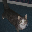

In [14]:
Image.fromarray(((train_tr[844][0] / 2 + 0.5) * 255).moveaxis(0, -1).numpy().astype(np.uint8))

## Data Loaders

In [15]:
batch_size=80

In [16]:
train_dl = torch.utils.data.DataLoader(train_tr, batch_size=batch_size, shuffle=True)

In [17]:
test_dl = torch.utils.data.DataLoader(test_tr, batch_size=len(test_tr), shuffle=False)

## Load Model

In [18]:
%run model.ipynb

Model setup complete


## Training process

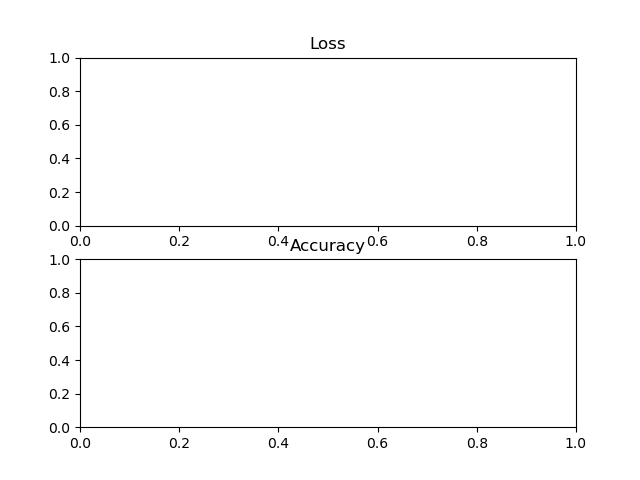

In [28]:
%matplotlib ipympl
fig, ax = start_plot()

In [29]:
%%time

CNN = Classifier_CNN()

CNN.to(torch_device)

epochs = 200

loss_hist = []
accuracy_hist = []

for i in range(epochs):
    loss = 0
    accuracy = 0
    print('training epoch', i+1, "of", epochs)
    for _, data in enumerate(train_dl, 0):
        images_data = data[0].to(torch_device)
        labels = data[1].to(torch_device)

        iter_loss, iter_acc = CNN.run_training(images_data, labels)
        loss += iter_loss
        accuracy += iter_acc

    loss /= len(train_dl)
    accuracy /= len(train_dl)
    loss_hist.append(loss)
    accuracy_hist.append(accuracy.cpu())
    print('loss=', loss, 'accuracy=', accuracy)
    with plt.ioff():
        ax[0].plot(loss_hist, color='blue', label='train')
        ax[1].plot(accuracy_hist, color='blue', label='train')
        fig.canvas.draw()
        
CNN.model.eval()

training epoch 1 of 200
loss= 1.099855722803058 accuracy= tensor(0.3179, device='cuda:0')
training epoch 2 of 200
loss= 1.0978469848632812 accuracy= tensor(0.3098, device='cuda:0')
training epoch 3 of 200
loss= 1.0956299955194646 accuracy= tensor(0.3576, device='cuda:0')
training epoch 4 of 200
loss= 1.094132965261286 accuracy= tensor(0.3720, device='cuda:0')
training epoch 5 of 200
loss= 1.0933390602920994 accuracy= tensor(0.3738, device='cuda:0')
training epoch 6 of 200
loss= 1.0925312114484382 accuracy= tensor(0.3742, device='cuda:0')
training epoch 7 of 200
loss= 1.0913466287381721 accuracy= tensor(0.3718, device='cuda:0')
training epoch 8 of 200
loss= 1.0904099146525066 accuracy= tensor(0.3710, device='cuda:0')
training epoch 9 of 200
loss= 1.0890096859498457 accuracy= tensor(0.3706, device='cuda:0')
training epoch 10 of 200
loss= 1.0879192352294922 accuracy= tensor(0.3739, device='cuda:0')
training epoch 11 of 200
loss= 1.0859811089255593 accuracy= tensor(0.3735, device='cuda:0')

Sequential(
  (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1))
  (1): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1))
  (2): LeakyReLU(negative_slope=0.01)
  (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (4): Dropout(p=0.2, inplace=False)
  (5): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
  (6): LeakyReLU(negative_slope=0.01)
  (7): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (8): Dropout(p=0.2, inplace=False)
  (9): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1))
  (10): LeakyReLU(negative_slope=0.01)
  (11): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (12): Dropout(p=0.2, inplace=False)
  (13): View()
  (14): Linear(in_features=512, out_features=128, bias=True)
  (15): LeakyReLU(negative_slope=0.01)
  (16): Dropout(p=0.2, inplace=False)
  (17): Linear(in_features=128, out_features=3, bias=True)
)

## Test model on the test set

In [30]:
def print_metrics_function(y_test, y_pred):
    print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))
    confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)
    print("Confusion Matrix:")
    print(confmat)
    print('Precision: %.3f' % precision_score(y_true=y_test, y_pred=y_pred, average='weighted'))
    print('Recall: %.3f' % recall_score(y_true=y_test, y_pred=y_pred, average='weighted'))
    print('F1-mesure: %.3f' % f1_score(y_true=y_test, y_pred=y_pred, average='weighted'))

In [31]:
with torch.no_grad():
    for imgs, labels in test_dl:
        batch_size = imgs.shape[0]
        outputs = CNN.forward(imgs.to(torch_device))
        vals, preds = torch.max(outputs, dim=1)
        print_metrics_function(labels, preds.cpu())
        print()

Accuracy: 0.89
Confusion Matrix:
[[213  10   5]
 [ 17 172   8]
 [ 26   4 192]]
Precision: 0.896
Recall: 0.892
F1-mesure: 0.892



## ONNX

#### Export

In [23]:
#dummy input for export
dummy_input = torch.rand(1, 3, 32, 32).to(torch_device)

#export the model to ONNX
onnx_path = "finalProject_model.onnx"

#export
torch.onnx.export(
    CNN,
    dummy_input,
    onnx_path,
    verbose=False,
    input_names=['input'],
    output_names=['output']
)

print(f"Model exported to {onnx_path}")

Model exported to finalProject_model.onnx


#### Verification

In [24]:
#load model
onnx_model = onnx.load(onnx_path)

#create runtime session
ort_session = onnxruntime.InferenceSession(onnx_path)

#fill with dummy data
input_data = dummy_input.cpu().numpy()

#run model with ONNX runtime
ort_inputs={ort_session.get_inputs()[0].name: input_data}
ort_outputs=ort_session.run(None, ort_inputs)

print("Labels: ", train_tr.labels)
print("ONNX Runtime outputs", ort_outputs)

Labels:  ['notPanda', 'panda', 'redPanda']
ONNX Runtime outputs [array([[ 2.0371966 , -1.3835065 , -0.62636614]], dtype=float32)]
